In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')


In [147]:
data = pd.read_csv('sonar.csv')
data

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [148]:
data.keys()

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [149]:
data.dtypes

0.0200    float64
0.0371    float64
0.0428    float64
0.0207    float64
0.0954    float64
           ...   
0.0180    float64
0.0084    float64
0.0090    float64
0.0032    float64
R          object
Length: 61, dtype: object

In [150]:
data.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [152]:
data.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [153]:
data.isnull()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


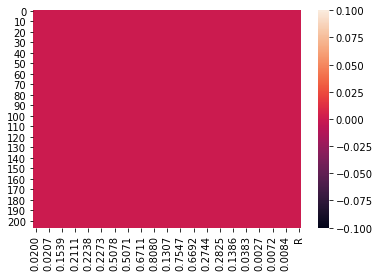

In [154]:
sns.heatmap(data.isnull())

In [155]:
datacor=data.corr()
datacor

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0.0200,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
0.0371,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
0.0428,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
0.0207,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
0.0954,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
0.0986,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
0.1539,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
0.1601,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
0.3109,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
0.2111,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


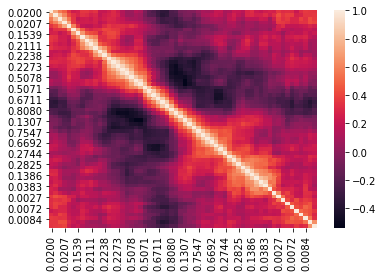

In [156]:
sns.heatmap(datacor)

In [157]:
x=data.iloc[:,0:-1]
x

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [158]:
pca =PCA(n_components=10)

In [159]:
y = data.iloc[:,-1]
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: R, Length: 207, dtype: object

In [160]:
xpca = pca.fit_transform(x)

In [161]:
x=xpca

In [162]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scale = StandardScaler()

In [183]:
x = scale.fit_transform(x)

In [184]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [185]:
lr=LogisticRegression()

In [186]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           M       0.74      0.96      0.84        24
           R       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46



In [187]:
gnb = GaussianNB()

In [188]:
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.782608695652174
[[21  3]
 [ 7 15]]
              precision    recall  f1-score   support

           M       0.75      0.88      0.81        24
           R       0.83      0.68      0.75        22

    accuracy                           0.78        46
   macro avg       0.79      0.78      0.78        46
weighted avg       0.79      0.78      0.78        46



In [189]:
svc =SVC()

In [190]:
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8913043478260869
[[23  1]
 [ 4 18]]
              precision    recall  f1-score   support

           M       0.85      0.96      0.90        24
           R       0.95      0.82      0.88        22

    accuracy                           0.89        46
   macro avg       0.90      0.89      0.89        46
weighted avg       0.90      0.89      0.89        46



In [191]:
dt= DecisionTreeClassifier()

In [192]:
dt.fit(x_train,y_train)
svc.score(x_train,y_train)
preddt=svc.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8913043478260869
[[23  1]
 [ 4 18]]
              precision    recall  f1-score   support

           M       0.85      0.96      0.90        24
           R       0.95      0.82      0.88        22

    accuracy                           0.89        46
   macro avg       0.90      0.89      0.89        46
weighted avg       0.90      0.89      0.89        46



In [193]:
knn=KNeighborsClassifier()

In [194]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
preddt=knn.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.8260869565217391
[[22  2]
 [ 6 16]]
              precision    recall  f1-score   support

           M       0.79      0.92      0.85        24
           R       0.89      0.73      0.80        22

    accuracy                           0.83        46
   macro avg       0.84      0.82      0.82        46
weighted avg       0.84      0.83      0.82        46



In [195]:
from sklearn.model_selection import cross_val_score
gnbscores = cross_val_score(gnb,x,y, cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.42857143 0.73809524 0.43902439 0.73170732 0.3902439 ]
0.5455284552845528 0.15548626224792733


In [196]:
from sklearn.model_selection import cross_val_score
svcscores = cross_val_score(svc,x,y, cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.45238095 0.76190476 0.51219512 0.75609756 0.3902439 ]
0.5745644599303136 0.15546283624706844


In [197]:
from sklearn.model_selection import cross_val_score
dtscores = cross_val_score(dt,x,y, cv=5)
print(dtscores)
print(dtscores.mean(),dtscores.std())

[0.45238095 0.66666667 0.48780488 0.73170732 0.53658537]
0.5750290360046457 0.10684012451723256


In [200]:
import joblib
joblib.dump(lr,'sonar.csv')

['sonar.csv']